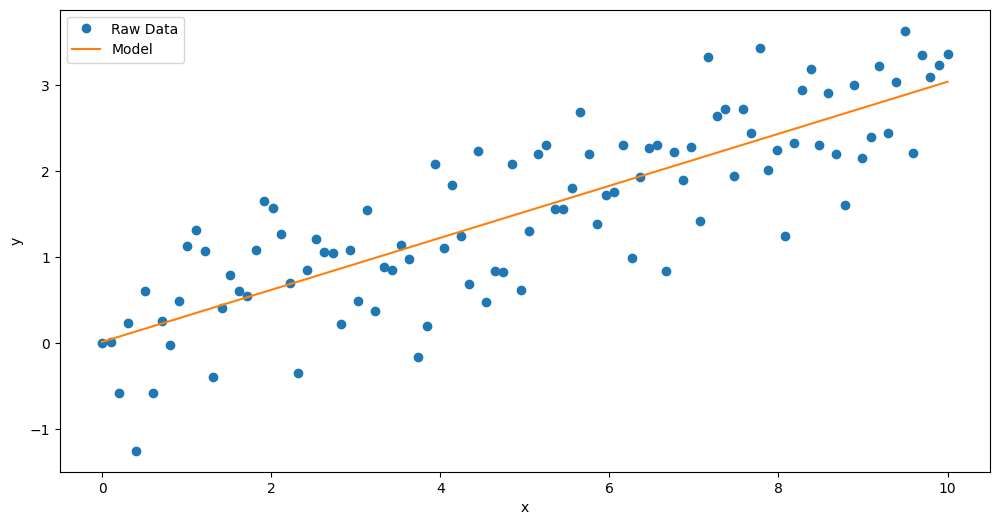

mean_squared_error 0.3412109104536083
r2_score 0.6956852019701004


In [42]:
# -*- coding: utf-8 -*-
import torch
import math
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.set_default_device(device)

def get_data ():
    w, b = 0.3, 0.134
    x = np.linspace (0,10,100)
    y = w * x + b 
    noise = np.random.normal (0.0,0.5, [len(x)])
    return x, y + noise 


def torch_linear_regression (x, y, niter):
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)
    
    w = torch.randn((), dtype=dtype, requires_grad=True)
    b = torch.randn((), dtype=dtype, requires_grad=True)

    learning_rate = 1e-4
    
    for t in range(niter):
        # Forward pass: compute predicted y using operations on Tensors.
        y_pred = b + w * x 
        # Compute and print loss using operations on Tensors.
        # Now loss is a Tensor of shape (1,)
        # loss.item() gets the scalar value held in the loss.
        
        loss = (y_pred - y).pow(2).sum()
        #if t % 100 == 99:
        #    print(t, loss.item(),w.detach().numpy(), b.detach().numpy() )

        loss.backward()

        # Manually update weights using gradient descent. Wrap in torch.no_grad()
        # because weights have requires_grad=True, but we don't need to track this
        # in autograd.
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad
      
        # Manually zero the gradients after updating weights
        w.grad = None
        b.grad = None
    return w.detach().numpy(), b.detach().numpy()

if __name__ == "__main__":
    niter = 10000 
    x , y =  get_data ()

    w, b = torch_linear_regression (x, y, niter)
    
    y_hat = b + w * x
    
    fig, axs = plt.subplots (1,1,figsize=(12,6))
    axs.plot(x,y,'o',label='Raw Data')
    axs.plot(x,y_hat,label='Model')
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.legend()
    plt.show()

    print("mean_squared_error",mean_squared_error(y,y_hat))
    print("r2_score",r2_score(y,y_hat))

